# Урок 3.
## Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

In [115]:
from math import factorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# функция для вычисления количества сочетаний:
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

## Задание 1
### Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

In [9]:
lst = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]
df = pd.DataFrame(lst)

### а) среднее арифметическое

In [22]:
mu = sum(lst)/len(lst)
print(f'Среднее арифметическое: {mu}')

Среднее арифметическое: 65.3


### б) среднее квадратичное отклонение

In [47]:
sig = np.sqrt(((df[0] - mu)**2).sum() / df[0].count())
print(f'Среднее квадратичное отклонение: {sig:.4f}')

Среднее квадратичное отклонение: 30.8239


### в) смещенная оценка дисперсии

In [44]:
disp_sm = ((df[0] - df[0].mean())**2).sum() / df[0].count()
print(f'Смещенная оценка дисперсии: {disp_sm:.4f}')

Смещенная оценка дисперсии: 950.1100


### г) несмещенная оценка дисперсии

In [43]:
disp = ((df[0] - df[0].mean())**2).sum() / (df[0].count() - 1)
print(f'Несмещенная оценка дисперсии: {disp:.4f}')

Несмещенная оценка дисперсии: 1000.1158


In [50]:
# Проверочные расчеты
print(f'Среднее арифметическое: {mu}, mean =', df[0].mean())
print(f'Среднее квадратичное отклонение: {sig:.4f}, std =', df[0].std(ddof=0))

Среднее арифметическое: 65.3, mean = 65.3
Среднее квадратичное отклонение: 30.8239, std = 30.823854398825596


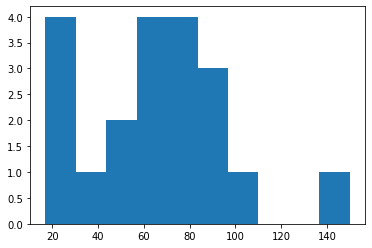

In [116]:
plt.hist(df[0])
plt.show()

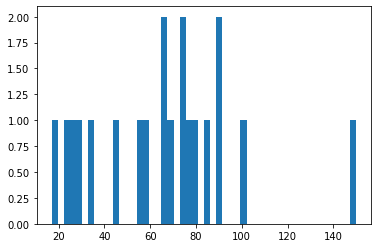

In [121]:
plt.hist(df[0], bins = 50)
plt.show()

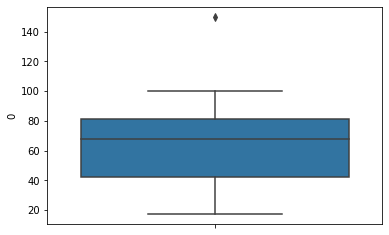

In [122]:
import seaborn as sns
sns.boxplot(df[0], orient='v')
plt.show()

## Задание 2
### В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?

Рассмотрим 3 случая:
    1. Из 1-го ящика берем 2 белых из 5, из 2-го 1 белый мяч из 5
    2. Из 1-го ящика берем 1 белый, из 2-го 2 белых мяча
    3. Из 1-го ящика берем 0 белых, из 2-го 3 белых мяча
    
Учитываем при этом, что остальные взятые мячи будут черные.
#### $$P = \frac{C_{5}^2}{C_{8}^2} \cdot \frac{C_{5}^1 \cdot C_{7}^3}{C_{12}^4} + \frac{C_{5}^1 \cdot C_{3}^1}{C_{8}^2} \cdot \frac{C_{5}^2 \cdot C_{7}^2}{C_{12}^4} + \frac{C_{3}^2}{C_{8}^2} \cdot \frac{C_{5}^3 \cdot C_{7}^1}{C_{12}^4}  $$

In [59]:
# Количество всех сочетаний для 1 и 2 ящика
n1 = combinations(8, 2)  # 1 ящик
n2 = combinations(12, 4) # 2 ящик

In [69]:
# 1
m1w = combinations(5, 2)   
m2w = combinations(5, 1)   
m2b = combinations(7, 3)  # 3 черных из 7 черных
p1 = (m1w / n1) * (m2w * m2b / n2)
p1

0.12626262626262627

In [70]:
# 2
m1w = combinations(5, 1)   
m1b = combinations(3, 1)   
m2w = combinations(5, 2)   
m2b = combinations(7, 2)  # 2 черных из 7 черных
p2 = (m1w * m1b / n1) * (m2w * m2b / n2)
p2

0.22727272727272727

In [72]:
# 3
m1b = combinations(3, 2)   
m2w = combinations(5, 3)   
m2b = combinations(7, 1)  # 1 черный из 7 черных
p3 = (m1b / n1) * (m2w * m2b / n2)
p3

0.01515151515151515

In [75]:
p = p1 + p2 + p3
print(f'Вероятность, что 3 мяча белые: {p:.4f}')

Вероятность, что 3 мяча белые: 0.3687


## Задание 3
### На соревновании по биатлону один из трех спортсменов стреляет и попадает в мишень. Вероятность попадания для первого спортсмена равна 0.9, для второго — 0.8, для третьего — 0.6. 

Если воспользоваться примером 11 из Матстат_Урок_1 получим
$$P(B_x\:|\:A) = \frac{P(B_x) \cdot P(A\:|\:B_x)}{P(A)}$$
где
событием  𝐴  будем считать попадание в мишень, а событиями  𝐵1,𝐵2  и  𝐵3  — что выстрел совершил первый, второй или третий спортсмен. При успешном выстреле:
$$P(A\:|\:B_1) = 0.9$$
$$P(A\:|\:B_2) = 0.8$$
$$P(A\:|\:B_3) = 0.6$$
$$P(B_x) = \frac{1}{n} = \frac{1}{3} $$
$$P(A) = {\frac{1}{3} \cdot P(A\:|\:B_1) + \frac{1}{3} \cdot P(A\:|\:B_2) + \frac{1}{3} \cdot P(A\:|\:B_3)} $$

In [84]:
p_ab1 = 0.9
p_ab2 = 0.8
p_ab3 = 0.6
n = 3
p_a = p_ab1 / n + p_ab2 / n + p_ab3 / n
p_a

0.7666666666666666

### Найти вероятность того, что выстрел произведен:

### a) первым спортсменом 

In [85]:
p_b1 = p_ab1 / n / p_a
print(f'Вероятность того, что выстрел произведен первым спортсменом: {p_b1:.4}')

Вероятность того, что выстрел произведен первым спортсменом: 0.3913


### б) вторым спортсменом 

In [86]:
p_b2 = p_ab2 / n / p_a
print(f'Вероятность того, что выстрел произведен вторым спортсменом: {p_b2:.4}')

Вероятность того, что выстрел произведен вторым спортсменом: 0.3478


### в) третьим спортсменом

In [87]:
p_b3 = p_ab3 / n / p_a
print(f'Вероятность того, что выстрел произведен  третьим спортсменом: {p_b3:.4}')

Вероятность того, что выстрел произведен  третьим спортсменом: 0.2609


## Задание 4
### В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: 

Опять воспользуемся Формулой Байеса и получим
$$P(B_x\:|\:A) = \frac{P(B_x) \cdot P(A\:|\:B_x)}{P(A)}$$
где
событием  𝐴  будем считать сдачу сессии, а событиями  𝐵1, 𝐵2 и 𝐵3 — учебу на факультете А, B и C соответственно, n - количество студентов в группе А:
$$P(A\:|\:B_1) = 0.8$$
$$P(A\:|\:B_2) = 0.7$$
$$P(A\:|\:B_3) = 0.9$$
$$P(B_1) = \frac{1}{n}, P(B_2) = \frac{1}{n}, P(B_3) = \frac{2}{n} $$
$$P(A) = {\frac{1}{n} \cdot P(A\:|\:B_1) + \frac{1}{n} \cdot P(A\:|\:B_2) + \frac{2}{n} \cdot P(A\:|\:B_3)} $$
n при расчетах сокращается и получаем:
$$P(B_1\:|\:A) = \frac{P(A\:|\:B_1)}{P(A\:|\:B_1) + P(A\:|\:B_2) + 2 P(A\:|\:B_3)}$$

### a) на факультете A?

In [90]:
p_ab1 = 0.8
p_ab2 = 0.7
p_ab3 = 0.9

p_b1 = p_ab1 / (p_ab1 + p_ab2 + 2 * p_ab3)
print(f'Вероятность, что c=студент учится на факультете А: {p_b1:.4}')

Вероятность, что c=студент учится на факультете А: 0.2424


### б) на факультете B?
$$P(B_2\:|\:A) = \frac{P(A\:|\:B_2)}{P(A\:|\:B_1) + P(A\:|\:B_2) + 2 P(A\:|\:B_3)}$$

In [92]:
p_b2 = p_ab2 / (p_ab1 + p_ab2 + 2 * p_ab3)
print(f'Вероятность, что c=студент учится на факультете В: {p_b2:.4}')

Вероятность, что c=студент учится на факультете В: 0.2121


### в) на факультете C?
$$P(B_3\:|\:A) = \frac{2 * P(A\:|\:B_3)}{P(A\:|\:B_1) + P(A\:|\:B_2) + 2 * P(A\:|\:B_3)}$$

In [94]:
p_b3 = 2 * p_ab3 / (p_ab1 + p_ab2 + 2 * p_ab3)
print(f'Вероятность, что c=студент учится на факультете С: {p_b3:.4}')

Вероятность, что c=студент учится на факультете С: 0.5455


## Задание 5
### Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: 

In [97]:
p1 = 0.1
p2 = 0.2
p3 = 0.25

### а) все детали 

In [107]:
p_3 = p1 * p2 * p3
print(f'Вероятность того, что в первый месяц выйдут из строя все детали: {p_3:.4f}')

Вероятность того, что в первый месяц выйдут из строя все детали: 0.0050


### б) только две детали

In [108]:
p_2 =  p1 * p2 * (1 - p3) + p1 * (1 - p2) * p3 + (1 - p1) * p2 * p3
print(f'Вероятность того, что в первый месяц выйдут из строя только две детали: {p_2:.4f}')

Вероятность того, что в первый месяц выйдут из строя только две детали: 0.0800


### в) хотя бы одна деталь 

In [112]:
p_1 = p1 * (1 - p2) * (1 - p3) + (1 - p1) * p2 * (1 - p3) + (1 - p1) * (1 - p2) * p3 + p_2 + p_3
p = 1 - (1 - p1) * (1 - p2) * (1 - p3)
print(f'Вероятность того, что в первый месяц выйдут из строя хотя бы одна деталь: {p:.4f} или {p_1}')

Вероятность того, что в первый месяц выйдут из строя хотя бы одна деталь: 0.4600 или 0.46


### г) от одной до двух деталей?

In [113]:
p = p_1 - p_3
print(f'Вероятность того, что в первый месяц выйдут из строя  от одной до двух деталей: {p:.4f}')

Вероятность того, что в первый месяц выйдут из строя  от одной до двух деталей: 0.4550
